In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [3]:
df = pd.read_csv('../data/raw/erling_haaland_2022_understat.csv')

In [4]:
# each row is a shot
# expected goal value
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [5]:
# data is scaled between 0 and 1
# to work with mplsoccer, we need in between 0 and 100
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [6]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,93.599998,50.299999,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,88.500000,50.000000,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,86.400002,40.500000,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,95.300003,55.200001,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,89.400002,71.000000,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [7]:
# pre-calculate the statistics
# total shots
total_shots = df.shape[0] # total length of the data frame
total_shots

123

In [8]:
total_goals = df[df['result'] == 'Goal'].shape[0]
total_goals

36

In [9]:
total_xG = df['xG'].sum()
total_xG

np.float64(32.76137728616595)

In [10]:
xG_per_shot = total_xG / total_shots
xG_per_shot

np.float64(0.2663526608631378)

In [11]:
# calculate the scatter point
points_average_distance = df['X'].mean()
points_average_distance

np.float64(90.2333329983843)

In [12]:
# usually soccer pitches are 120 yards
# scaling the X values by 1.2
actual_average_distance = 120 - (df['X'] * 1.2).mean()
actual_average_distance

np.float64(11.720000401938833)

In [13]:
# Count the number of each unique 'shotType' and store them in variables
shot_type_counts = df['shotType'].value_counts()

# Extracting individual shot type counts into variables
left_foot_count = shot_type_counts.get('LeftFoot', 0)
right_foot_count = shot_type_counts.get('RightFoot', 0)
head_count = shot_type_counts.get('Head', 0)
other_count = shot_type_counts.get('Other', 0)  # In case there's any other shot type

shot_type_counts, left_foot_count, right_foot_count, head_count, other_count

(shotType
 LeftFoot         75
 Head             28
 RightFoot        19
 OtherBodyPart     1
 Name: count, dtype: int64,
 np.int64(75),
 np.int64(19),
 np.int64(28),
 0)

In [14]:
# coloring (limiting the number of colors very well)
background_color = '#0C0D0E'

In [15]:
# brand consistency
# same font in every visualisation

(0.0, 1.0)

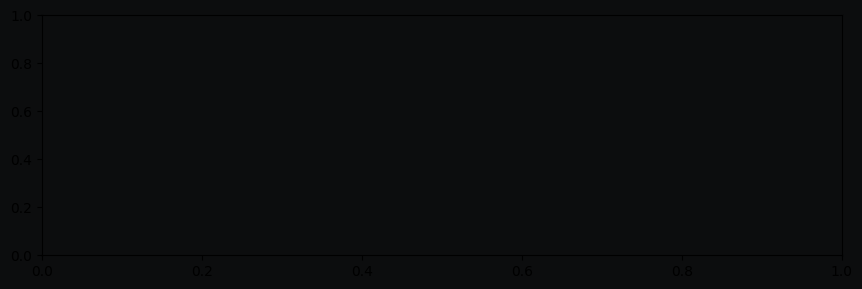

In [16]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# create 3 sections
ax1 = fig.add_axes([0, .7, 1, .2]) # creating a grid with 3 sections
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

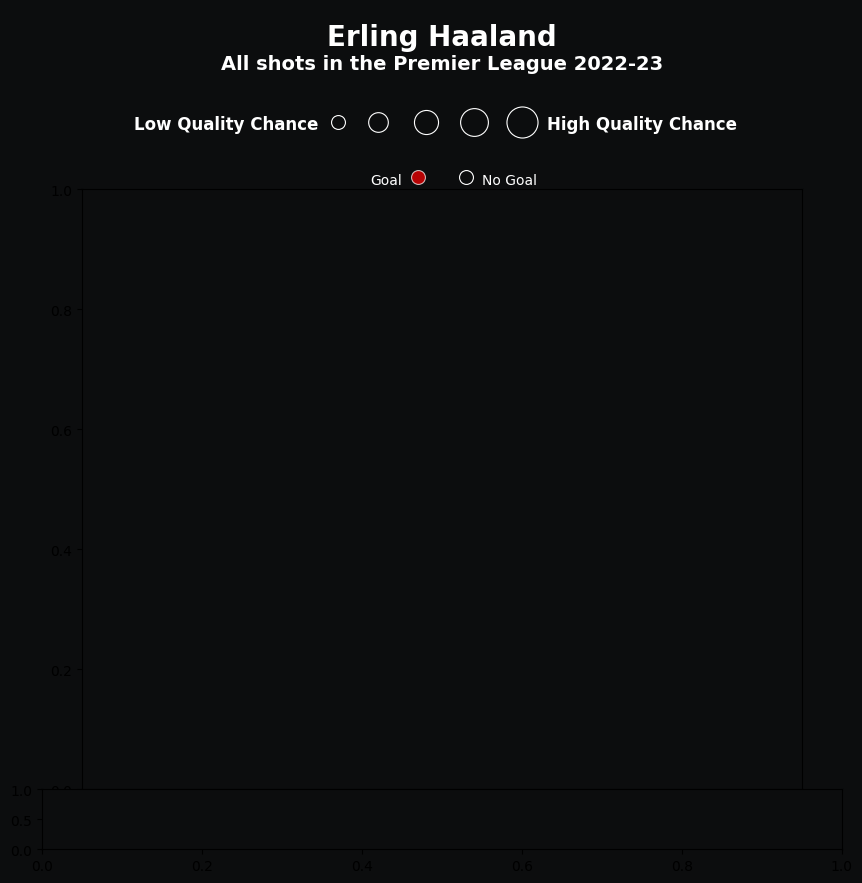

In [17]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# create 3 sections
ax1 = fig.add_axes([0, .7, 1, .2]) # creating a grid with 3 sections
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x = .5,
    y = .85,
    s = 'Erling Haaland',
    fontsize = 20,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .5,
    y = .75,
    s = 'All shots in the Premier League 2022-23',
    fontsize = 14,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .23,
    y = .5,
    s = 'Low Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# add scatter point in between

ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
    
ax1.text(
    x = .75,
    y = .5,
    s = 'High Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, .25, .9, .5]) # creating a grid with 3 sections
ax2.set_facecolor(background_color)


ax3 = fig.add_axes([0, .2, 1, .05]) # creating a grid with 3 sections
ax3.set_facecolor(background_color)

In [18]:
pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

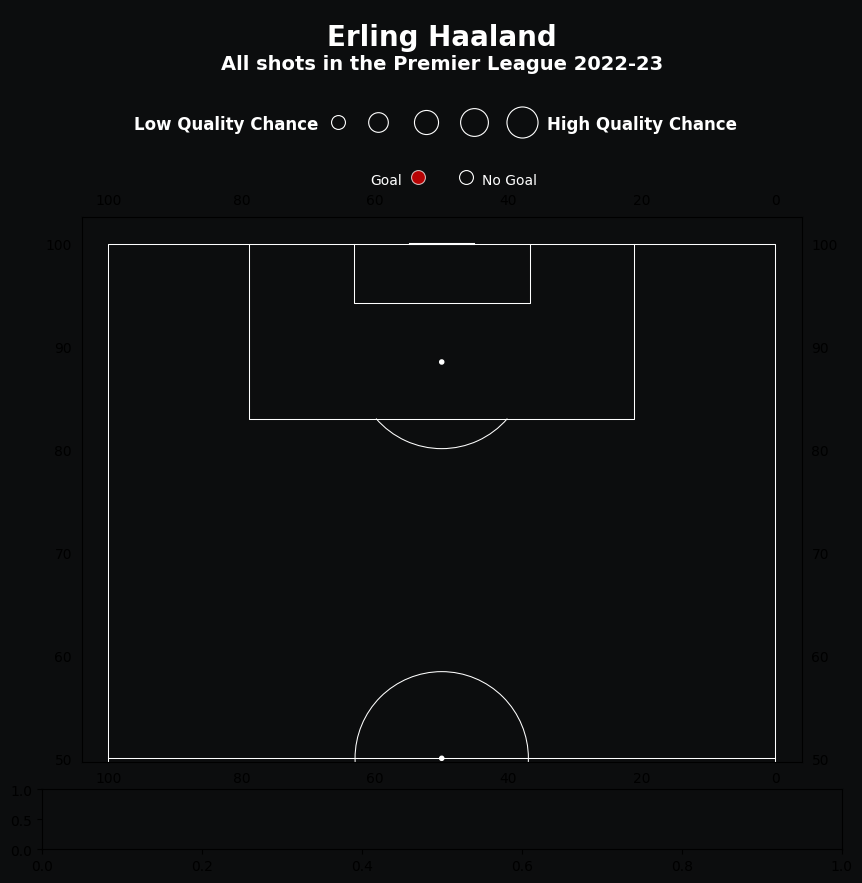

In [19]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# create 3 sections
ax1 = fig.add_axes([0, .7, 1, .2]) # creating a grid with 3 sections
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x = .5,
    y = .85,
    s = 'Erling Haaland',
    fontsize = 20,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .5,
    y = .75,
    s = 'All shots in the Premier League 2022-23',
    fontsize = 14,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .23,
    y = .5,
    s = 'Low Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# add scatter point in between

ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
    
ax1.text(
    x = .75,
    y = .5,
    s = 'High Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, .25, .9, .5]) # creating a grid with 3 sections
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

ax3 = fig.add_axes([0, .2, 1, .05]) # creating a grid with 3 sections
ax3.set_facecolor(background_color)

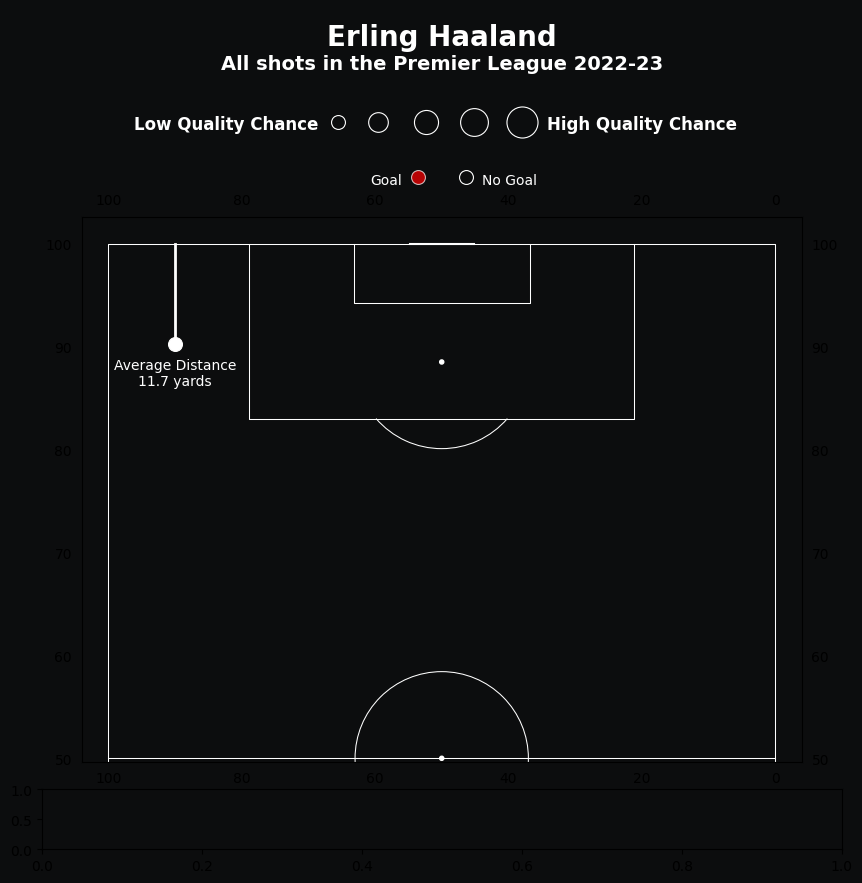

In [20]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# create 3 sections
ax1 = fig.add_axes([0, .7, 1, .2]) # creating a grid with 3 sections
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x = .5,
    y = .85,
    s = 'Erling Haaland',
    fontsize = 20,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .5,
    y = .75,
    s = 'All shots in the Premier League 2022-23',
    fontsize = 14,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .23,
    y = .5,
    s = 'Low Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# add scatter point in between

ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
    
ax1.text(
    x = .75,
    y = .5,
    s = 'High Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, .25, .9, .5]) # creating a grid with 3 sections
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10,
    color='white', 
    ha='center'
)

ax3 = fig.add_axes([0, .2, 1, .05]) # creating a grid with 3 sections
ax3.set_facecolor(background_color)

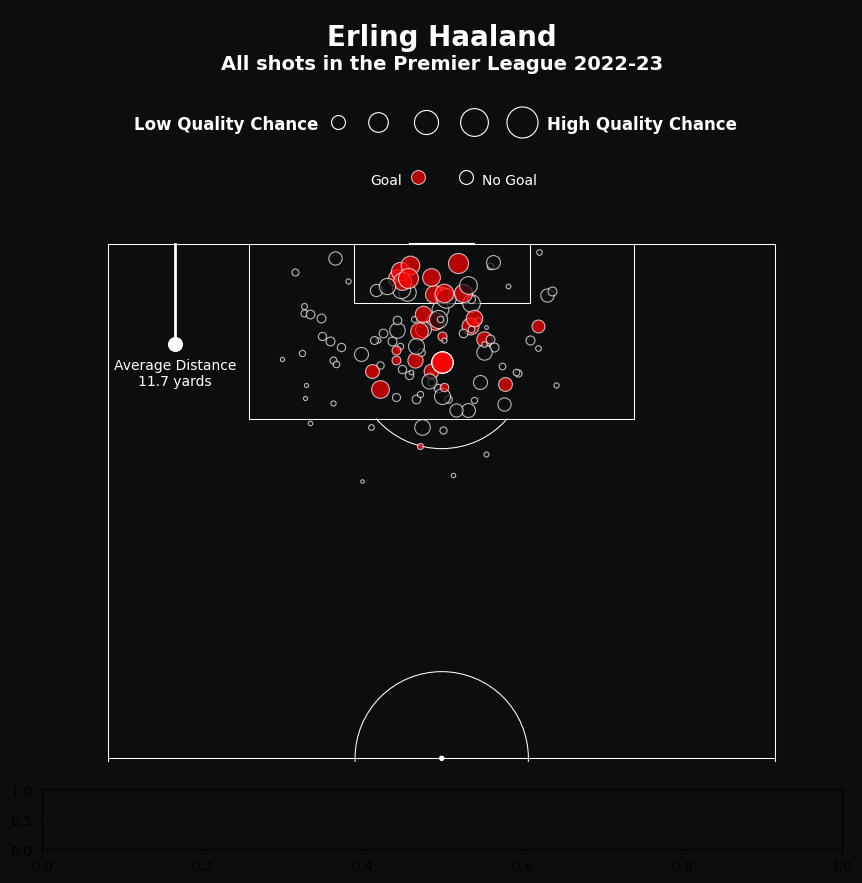

In [21]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# create 3 sections
ax1 = fig.add_axes([0, .7, 1, .2]) # creating a grid with 3 sections
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x = .5,
    y = .85,
    s = 'Erling Haaland',
    fontsize = 20,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .5,
    y = .75,
    s = 'All shots in the Premier League 2022-23',
    fontsize = 14,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .23,
    y = .5,
    s = 'Low Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# add scatter point in between

ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
    
ax1.text(
    x = .75,
    y = .5,
    s = 'High Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, .25, .9, .5]) # creating a grid with 3 sections
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10,
    color='white', 
    ha='center'
)

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

ax3 = fig.add_axes([0, .2, 1, .05]) # creating a grid with 3 sections
ax3.set_facecolor(background_color)

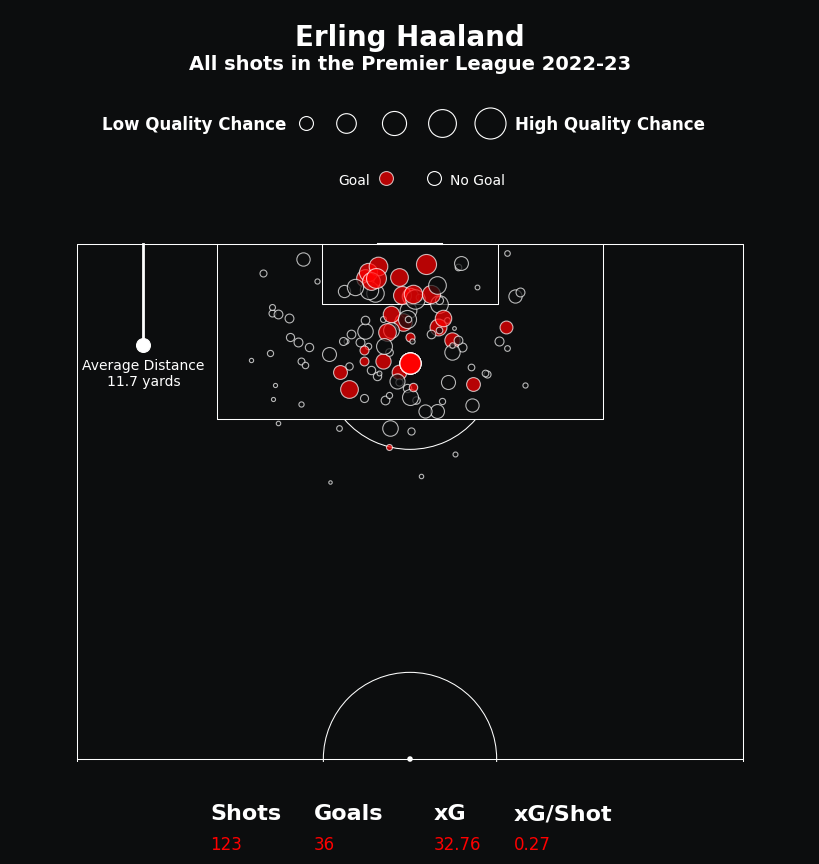

In [22]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# create 3 sections
ax1 = fig.add_axes([0, .7, 1, .2]) # creating a grid with 3 sections
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x = .5,
    y = .85,
    s = 'Erling Haaland',
    fontsize = 20,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .5,
    y = .75,
    s = 'All shots in the Premier League 2022-23',
    fontsize = 14,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

ax1.text(
    x = .23,
    y = .5,
    s = 'Low Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)

# add scatter point in between

ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
    
ax1.text(
    x = .75,
    y = .5,
    s = 'High Quality Chance',
    fontsize = 12,
    fontweight = 'bold',
    color = 'white',
    ha = 'center'
)
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

ax2 = fig.add_axes([.05, .25, .9, .5]) # creating a grid with 3 sections
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10,
    color='white', 
    ha='center'
)

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

ax3 = fig.add_axes([0, .2, 1, .05]) # creating a grid with 3 sections
ax3.set_facecolor(background_color)

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=16, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=12, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=16, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=12,
    color='red', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=16,
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=12,
    color='red', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=16, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=12,
    color='red', 
    ha='left'
)

ax3.set_axis_off()

In [23]:
# save the figure
fig.savefig('../visualizations/erling_haaland_2022.png', facecolor=background_color, bbox_inches='tight')